In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
import math
trainfile = pd.read_csv("train.csv")
testfile = pd.read_csv("test.csv")
#trainfile.info()

file = pd.concat(objs=(pd.read_csv('train.csv'),pd.read_csv('test.csv')),sort=False)
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7398 entries, 0 to 4397
Data columns (total 23 columns):
id                       7398 non-null int64
belongs_to_collection    1481 non-null object
budget                   7398 non-null int64
genres                   7375 non-null object
homepage                 2366 non-null object
imdb_id                  7398 non-null object
original_language        7398 non-null object
original_title           7398 non-null object
overview                 7376 non-null object
popularity               7398 non-null float64
poster_path              7396 non-null object
production_companies     6984 non-null object
production_countries     7241 non-null object
release_date             7397 non-null object
runtime                  7392 non-null float64
spoken_languages         7336 non-null object
status                   7396 non-null object
tagline                  5938 non-null object
title                    7395 non-null object
Keywords           

In [2]:
#Creating the various dictionaries
def formating(column,n=0):
    columndic = {}
    for s in column:
        try:
            s = s.strip("[]")
            ssplit = s.split('}, ')
            for s2 in ssplit:
                s2 = s2.strip('{')
                s2split = s2.split(', ')
                a = []
                for s3 in s2split:
                    s3split = s3.split(':')
                    s3splitformated = s3split[1]
                    s3splitformated = s3splitformated.strip(' ')
                    s3splitformated = s3splitformated.strip('}')
                    s3splitformated = s3splitformated.strip("'")
                    a.append(s3splitformated)
                if n==0:
                    columndic[a[0]] = a[1]
                else:
                    columndic[a[1]] = a[0]
        except:
            continue
    return columndic

genres = formating(file["genres"])
print(genres)
print(genres["9648"]+"\n\n")

production_companies = formating(file["production_companies"],1)
#print(production_companies)
for x in range(10):
    try:
        print(str(x),production_companies[str(x)])
    except:
        continue
print("\n\n")

production_countries = formating(file["production_countries"])
print(production_countries, "\n\n")

spoken_languages = formating(file["spoken_languages"])
print(spoken_languages, "\n\n")

status = set()
for item in file["status"]:
    status.add(item)
print(status,"\n\n")

keywords = formating(file["Keywords"])
#print(keywords,"\n\n")
l = list(keywords.keys())
l.sort()
for x in l[0:10]:
    print(x, keywords[x])
print("\n\n")

{'35': 'Comedy', '18': 'Drama', '10751': 'Family', '10749': 'Romance', '53': 'Thriller', '28': 'Action', '16': 'Animation', '12': 'Adventure', '27': 'Horror', '99': 'Documentary', '10402': 'Music', '80': 'Crime', '878': 'Science Fiction', '9648': 'Mystery', '10769': 'Foreign', '14': 'Fantasy', '10752': 'War', '37': 'Western', '36': 'History', '10770': 'TV Movie'}
Mystery


1 Lucasfilm
2 Walt Disney Pictures
3 Pixar Animation Studios
4 Paramount Pictures
5 Columbia Pictures
6 RKO Radio Pictures
7 DreamWorks
8 Fine Line Features
9 Gaumont



{'US': 'United States of America', 'IN': 'India', 'KR': 'South Korea', 'CA': 'Canada', 'RS': 'Serbia', 'GB': 'United Kingdom', 'AT': 'Austria', 'DE': 'Germany', 'FR': 'France', 'NZ': 'New Zealand', 'JP': 'Japan', 'IE': 'Ireland', 'IT': 'Italy', 'IL': 'Israel', 'BE': 'Belgium', 'CZ': 'Czech Republic', 'CN': 'China', 'BR': 'Brazil', 'AR': 'Argentina', 'CL': 'Chile', 'PE': 'Peru', 'HK': 'Hong Kong', 'RU': 'Russia', 'ES': 'Spain', 'TR': 'Turkey', 'AU': '

In [3]:
#Adding the new columns at the end of the train file
'''
trainfile['genres_formatted'] = 'default_value'

for element in trainfile['genres']:
    if type(element) is str:
        s = ""
        for v in genres:
            if element.find(genres[v]) >= 0:
                if s == "":
                    s = v
                else:
                    s = s + "," + v
        trainfile.loc[trainfile['genres'] == element,'genres_formatted'] = s
#print(trainfile['genres_formatted'])
'''
def add_column(col_name,filename):
    c = col_name + "_formatted"
    filename[c] = ''
    for element in filename[col_name]:
        s = ""
        if type(element) is str:
            for v in eval(col_name):
                if element.find(eval(col_name)[v]) >= 0:
                    if s == "":
                        s = v
                    else:
                        s = s + "," + v
                else:
                    continue
        filename.loc[filename[col_name] == element, c] = s


In [4]:
add_column("genres",trainfile)
add_column("production_companies",trainfile)
#print(trainfile['genres_formatted'])
#print(trainfile['production_companies_formatted'])

In [5]:
#add_column('spoken_languages')
#print(trainfile['spoken_languages_formatted'])

In [6]:
'''
print(spoken_languages)
print(trainfile['spoken_languages'])
for v in spoken_languages:
    print(spoken_languages[v])'''

"\nprint(spoken_languages)\nprint(trainfile['spoken_languages'])\nfor v in spoken_languages:\n    print(spoken_languages[v])"

In [7]:
d = {}
for g in genres:
    total = 0
    n = 0
    for element in trainfile['genres_formatted']:
        if element.find(g) >= 0:
            n += 1
            #print(trainfile.loc[trainfile['genres_formatted'] == element, 'revenue'].iloc[0])
            total += trainfile.loc[trainfile['genres_formatted'] == element, 'revenue'].iloc[0]
    d[genres[g]] = total/n
    print(genres[g],g,total,n,total/n)
print("\n")

from operator import itemgetter 
for key, value in sorted(d.items(), key = itemgetter(1), reverse = True):
    print(key, value)

Comedy 35 96465632589 1028 93838163.99708171
Drama 18 96643887415 1531 63124681.52514696
Family 10751 47553100862 260 182896541.7769231
Romance 10749 15917635165 571 27876769.11558669
Thriller 53 66104336303 789 83782428.77439797
Action 28 67827744979 741 91535418.32523617
Animation 16 33168896021 141 235240397.31205675
Adventure 12 70055237060 439 159579127.69931662
Horror 27 19354389562 301 64300297.54817276
Documentary 99 419494996 87 4821781.563218391
Music 10402 3022799260 100 30227992.6
Crime 80 29927895184 469 63812143.24946695
Science Fiction 878 24354748827 290 83981892.50689656
Mystery 9648 16136337286 225 71717054.60444444
Foreign 10769 63096515 31 2035371.4516129033
Fantasy 14 28063199841 232 120962068.28017241
War 10752 4067199628 100 40671996.28
Western 37 1890685417 43 43969428.302325584
History 36 4207212949 132 31872825.37121212
TV Movie 10770 42000000 1 42000000.0


Animation 235240397.31205675
Family 182896541.7769231
Adventure 159579127.69931662
Fantasy 120962068.28

In [8]:
#Display the 100 movies with the highest revenue
trainfile.nlargest(10,'revenue')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genres_formatted,production_companies_formatted
1126,1127,"[{'id': 86311, 'name': 'The Avengers Collectio...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,"[{'id': 242, 'name': 'new york'}, {'id': 5539,...","[{'cast_id': 46, 'character': 'Tony Stark / Ir...","[{'credit_id': '52fe4495c3a368484e02b1cf', 'de...",1519557910,"28,12,878","4,420,6033,84988"
1761,1762,"[{'id': 9485, 'name': 'The Fast and the Furiou...",190000000,"[{'id': 28, 'name': 'Action'}]",http://www.furious7.com/,tt2820852,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,27.275687,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Vengeance Hits Home,Furious 7,"[{'id': 830, 'name': 'car race'}, {'id': 3428,...","[{'cast_id': 17, 'character': 'Dominic Toretto...","[{'credit_id': '52fe4cc8c3a36847f823e681', 'de...",1506249360,28,"33,7154,40890,333,3341,6452,2531,86352,86655,8..."
2770,2771,"[{'id': 86311, 'name': 'The Avengers Collectio...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,37.379420,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,Avengers: Age of Ultron,"[{'id': 8828, 'name': 'marvel comic'}, {'id': ...","[{'cast_id': 76, 'character': 'Tony Stark / Ir...","[{'credit_id': '55d5f7d4c3a3683e7e0016eb', 'de...",1405403694,"28,12,878","420,76043,15357,84988"
684,685,NaN,160000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://movies.disney.com/beauty-and-the-beast-...,tt2771200,en,Beauty and the Beast,A live-action adaptation of Disney's version o...,287.253654,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Be our guest.,Beauty and the Beast,"[{'id': 254, 'name': 'france'}, {'id': 2343, '...","[{'cast_id': 174, 'character': 'Belle', 'credi...","[{'credit_id': '551879bec3a3681f840004eb', 'de...",1262886337,"10751,10749,14","2,10227,5888,6421"
2322,2323,"[{'id': 8650, 'name': 'Transformers Collection...",195000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.transformersmovie.com/,tt1399103,en,Transformers: Dark of the Moon,Sam Witwicky takes his first tenuous steps int...,4.503505,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The invasion we always feared. An enemy we nev...,Transformers: Dark of the Moon,"[{'id': 305, 'name': 'moon'}, {'id': 1612, 'na...","[{'cast_id': 3, 'character': 'Sam Witwicky', '...","[{'credit_id': '537f0b740e0a2624b40044d0', 'de...",1123746996,"28,12,878","4,2598,435,22826,6033,5955,19751,18208"
906,907,"[{'id': 263, 'name': 'The Dark Knight Collecti...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,tt1345836,en,The Dark Knight Rises,Following the death of District Attorney Harve...,20.582580,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",NaN,NaN,1084939099,"18,53,28,80","6194,923,9996,9993,7676"
2135,2136,"[{'id': 295, 'name': 'Pirates of the Caribbean...",380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,27.887720,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,"[{'id': 658, 'name': 'sea'}, {'id': 1316, 'nam...","[{'cast_id': 15, 'character': 'Captain Jack Sp...","[{'credit_id': '566b4

In [9]:
print(type(trainfile['belongs_to_collection'][0]),trainfile['belongs_to_collection'][0])
import ast
listofdict = ast.literal_eval(trainfile['belongs_to_collection'][0])
for dic in listofdict:
    if 'name' in dic.keys():
        print(str(dic['name']))
        

<class 'str'> [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
Hot Tub Time Machine Collection


In [10]:
def GetCSVFromListOfDict(keyNameToFetch,column,columnName):
    column=column.copy()
    column=column.fillna('[{}]')
    columnList=[]
    for index,row in column.iteritems():
        columnStr=''
        listofDict=ast.literal_eval(row)
        for dic in listofDict:
            if(keyNameToFetch in dic.keys()):
                columnStr=columnStr+';'+str(dic[keyNameToFetch]) 
        columnStr=columnStr.strip(';') # trim leading ;
        columnList.append(columnStr)

    tempDF=pd.DataFrame(columnList,columns=[columnName])
    return tempDF[columnName]

In [11]:
trainfile['belongs_to_collection']=GetCSVFromListOfDict('name',trainfile.belongs_to_collection,'belongs_to_collection')

In [12]:
print(trainfile)

        id            belongs_to_collection     budget  \
0        1  Hot Tub Time Machine Collection   14000000   
1        2  The Princess Diaries Collection   40000000   
2        3                                     3300000   
3        4                                     1200000   
4        5                                           0   
5        6                                     8000000   
6        7                                    14000000   
7        8                                           0   
8        9            The Muppet Collection          0   
9       10                                     6000000   
10      11                 Rocky Collection    1000000   
11      12  Revenge of the Nerds Collection          0   
12      13                                    15000000   
13      14          Chili Palmer Collection   53000000   
14      15                                   102000000   
15      16                                      500000   
16      17    

In [13]:
print(len(trainfile.belongs_to_collection))
trainfile.belongs_to_collection.value_counts()

3000


                                             2396
James Bond Collection                          16
Friday the 13th Collection                      7
The Pink Panther (Original) Collection          6
Police Academy Collection                       5
Pokémon Collection                              5
Rambo Collection                                4
Ice Age Collection                              4
Paranormal Activity Collection                  4
Rocky Collection                                4
Child's Play Collection                         4
Resident Evil Collection                        4
Transformers Collection                         4
The Fast and the Furious Collection             4
Alien Collection                                4
Mexico Trilogy                                  3
The Wolverine Collection                        3
Missing in Action Collection                    3
Alex Cross Collection                           3
Three Heroes Collection                         3


In [14]:
trainfile['belongs_to_collection_ISMISSING']=(trainfile.belongs_to_collection.str.strip()=='').astype(int)

In [15]:
trainfile[['belongs_to_collection_ISMISSING','revenue']].corr()

,belongs_to_collection_ISMISSING,revenue
belongs_to_collection_ISMISSING,1.000000,-0.339425
revenue,-0.339425,1.000000


In [16]:
trainfile.isna().sum()

id                                    0
belongs_to_collection                 0
budget                                0
genres                                7
homepage                           2054
imdb_id                               0
original_language                     0
original_title                        0
overview                              8
popularity                            0
poster_path                           1
production_companies                156
production_countries                 55
release_date                          0
runtime                               2
spoken_languages                     20
status                                0
tagline                             597
title                                 0
Keywords                            276
cast                                 13
crew                                 16
revenue                               0
genres_formatted                      0
production_companies_formatted        0


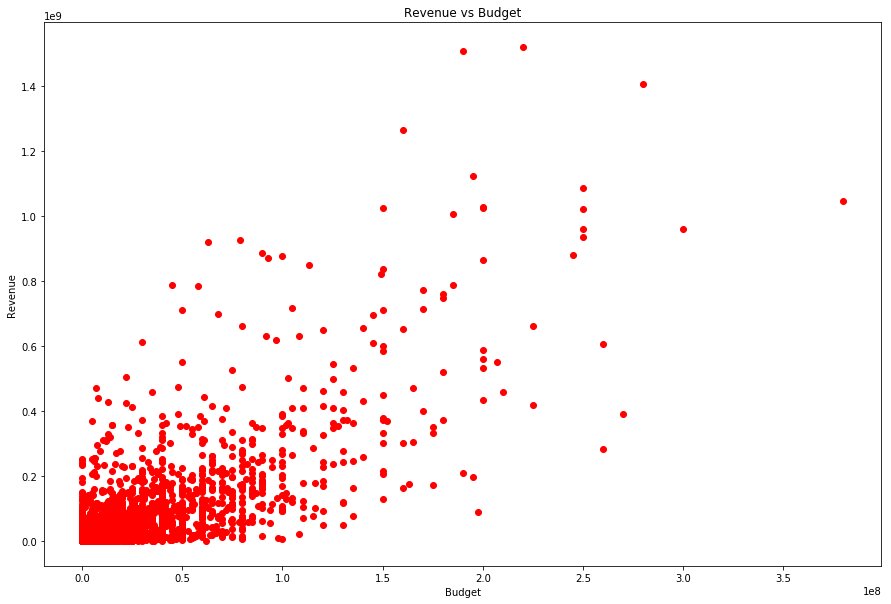

In [17]:
plt.figure(figsize=(15,10))
plt.scatter(trainfile['budget'],trainfile['revenue'],c="RED")
plt.title('Revenue vs Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

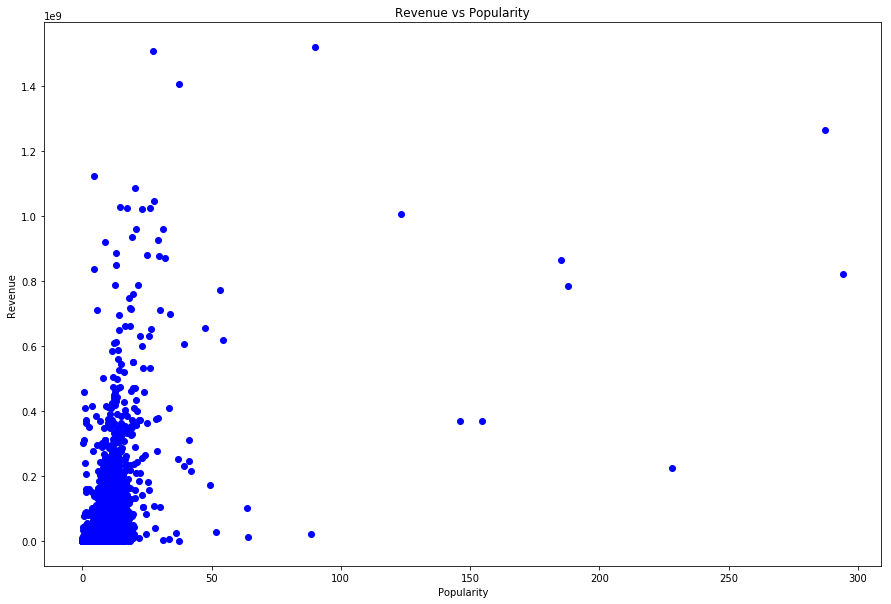

In [18]:
plt.figure(figsize=(15,10))
plt.scatter(trainfile['popularity'],trainfile['revenue'],c="BLUE")
plt.title('Revenue vs Popularity')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

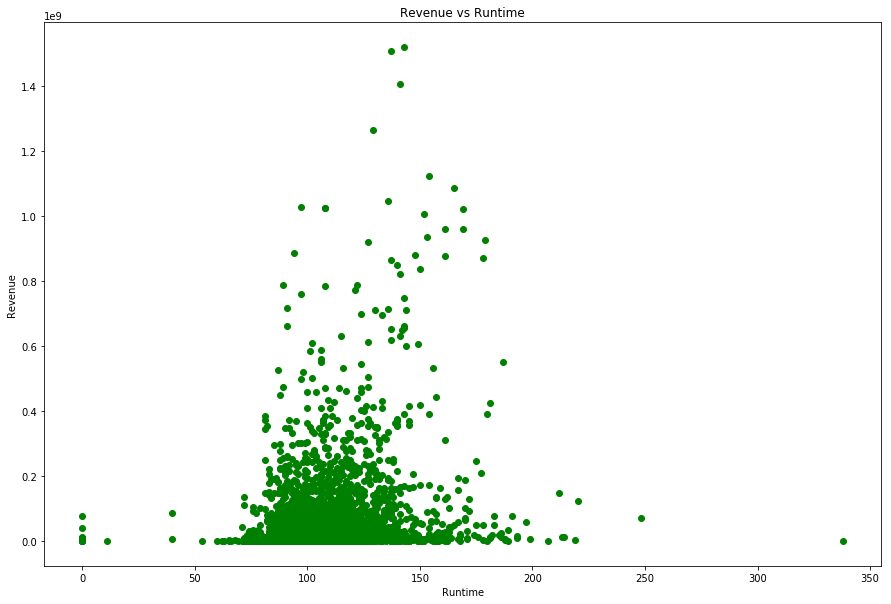

In [19]:
plt.figure(figsize=(15,10))
plt.scatter(trainfile['runtime'],trainfile['revenue'],c="GREEN")
plt.title('Revenue vs Runtime')
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.show()

In [20]:
trainfile.revenue.describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

C:\Users\yioua\Documents\UCSC\Python\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\yioua\Documents\UCSC\Python\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


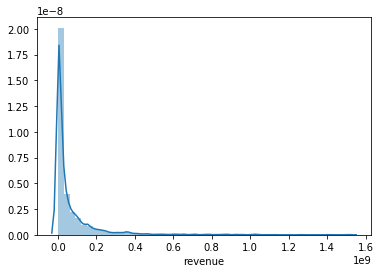

In [21]:
import seaborn as sns
sns.distplot(trainfile.revenue)

C:\Users\yioua\Documents\UCSC\Python\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\yioua\Documents\UCSC\Python\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


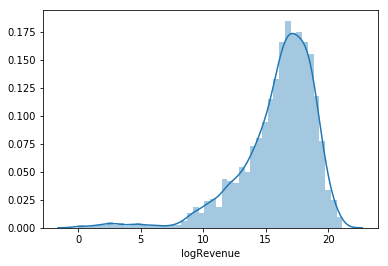

In [22]:
trainfile['logRevenue'] = np.log(trainfile.revenue)
sns.distplot(trainfile.logRevenue)

In [23]:
print(trainfile.release_date.describe())
print(trainfile.release_date.head())
trainfile[['release_month','release_day','release_year']] = trainfile.release_date.str.split('/',expand=True).replace(np.nan, -1).astype(int)
trainfile.loc[ (trainfile['release_year'] <= 19) & (trainfile['release_year'] < 100), "release_year"] += 2000
trainfile.loc[ (trainfile['release_year'] > 19)  & (trainfile['release_year'] < 100), "release_year"] += 1900

print(trainfile.release_day.head())
print(trainfile.release_month.head())
print(trainfile.release_year.head())

count        3000
unique       2398
top       9/10/10
freq            5
Name: release_date, dtype: object
0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
Name: release_date, dtype: object
0    20
1     6
2    10
3     9
4     5
Name: release_day, dtype: int32
0     2
1     8
2    10
3     3
4     2
Name: release_month, dtype: int32
0    2015
1    2004
2    2014
3    2012
4    2009
Name: release_year, dtype: int32


In [24]:
releaseDate = pd.to_datetime(trainfile['release_date']) 
trainfile['release_dayofweek'] = releaseDate.dt.dayofweek
trainfile['release_quarter'] = releaseDate.dt.quarter

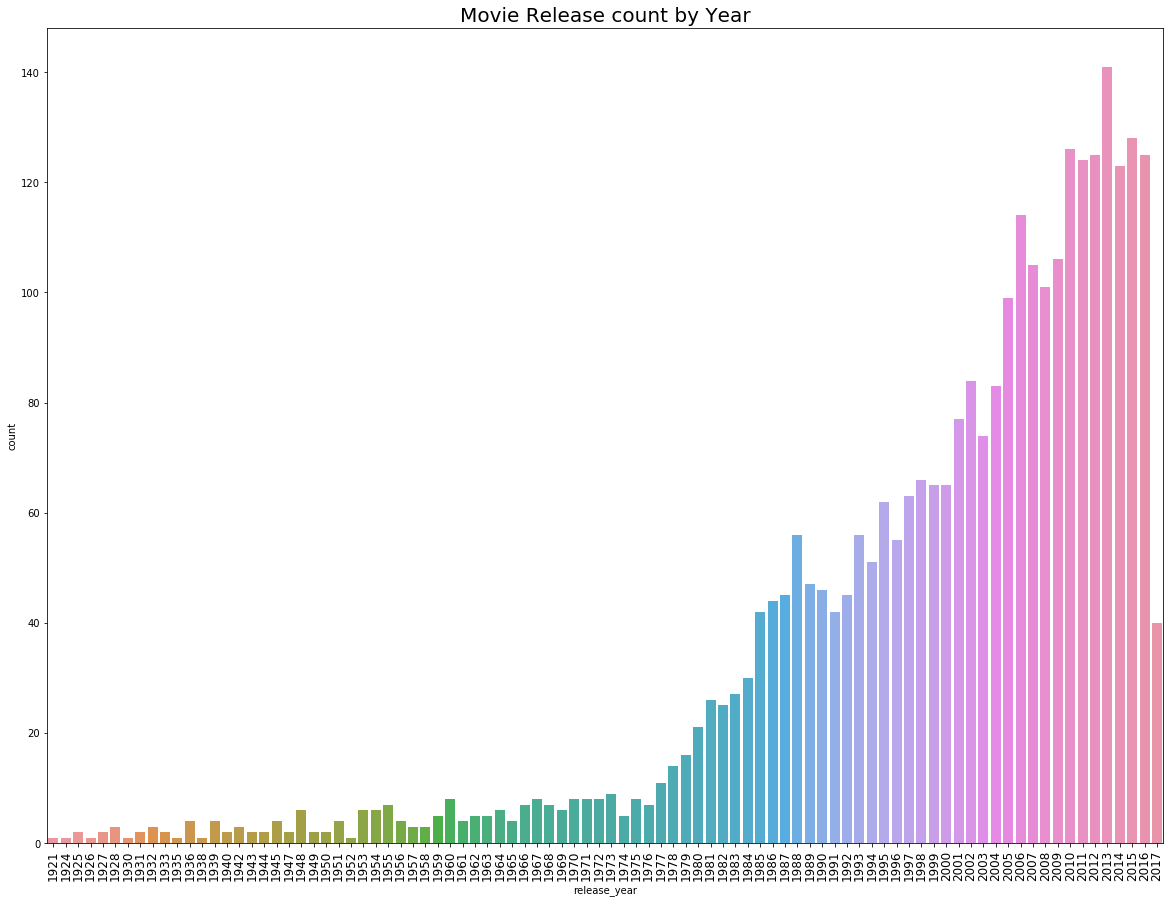

In [25]:
plt.figure(figsize=(20,15))
sns.countplot(trainfile['release_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

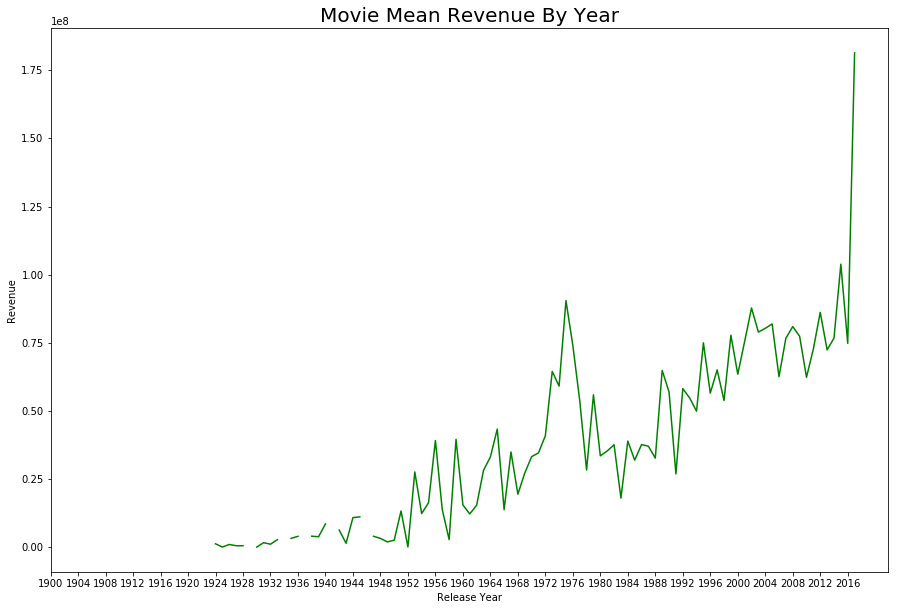

In [26]:
trainfile['meanRevenueByYear'] = trainfile.groupby("release_year")["revenue"].aggregate('mean')
trainfile['meanRevenueByYear'].plot(figsize=(15,10),color="g")
plt.xticks(np.arange(1900,2019,4))
plt.xlabel("Release Year")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue By Year",fontsize=20)
plt.show()

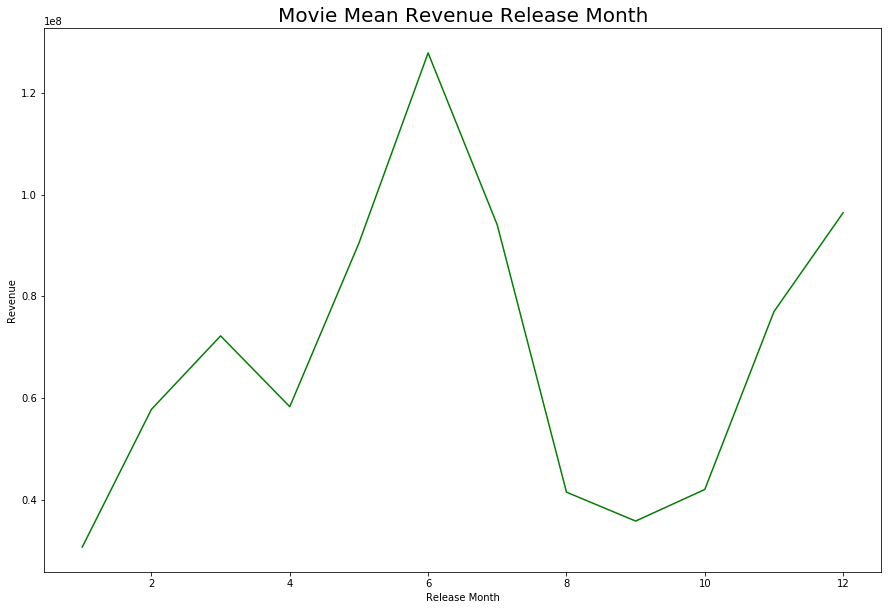

In [27]:
trainfile['meanRevenueByMonth'] = trainfile.groupby("release_month")["revenue"].aggregate('mean')
trainfile['meanRevenueByMonth'].plot(figsize=(15,10),color="g")
plt.xlabel("Release Month")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue Release Month",fontsize=20)
plt.show()

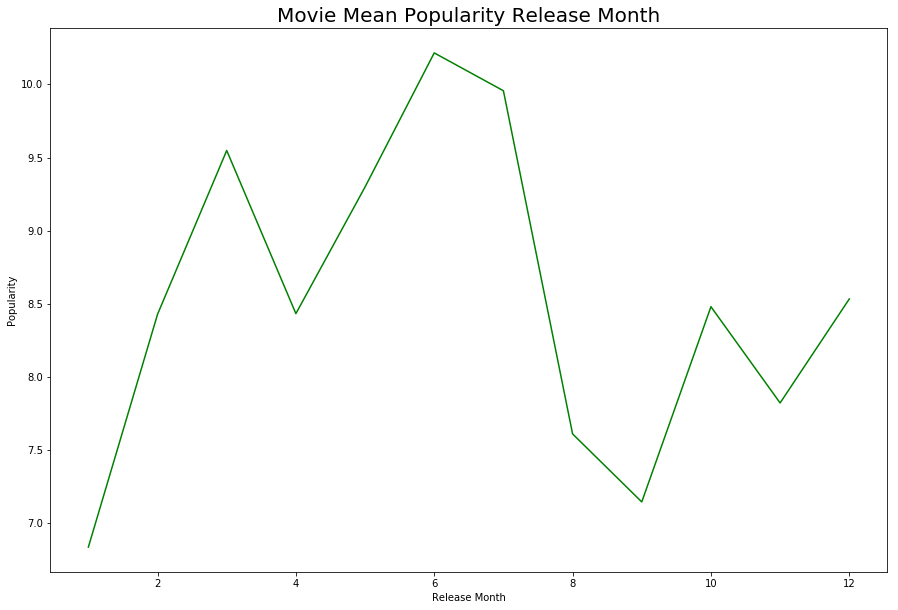

In [28]:
trainfile['meanPopularityByMonth'] = trainfile.groupby("release_month")["popularity"].aggregate('mean')
trainfile['meanPopularityByMonth'].plot(figsize=(15,10),color="g")
plt.xlabel("Release Month")
plt.ylabel("Popularity")
plt.title("Movie Mean Popularity Release Month",fontsize=20)
plt.show()

In [29]:
#Creating a matrix of the genre for each movies
genres_list = [int(k) for k in sorted(genres,reverse=True)]
genres_list.sort()
genres_list = [str(k) for k in genres_list]
print(genres_list)

genres_matrix = np.zeros((len(trainfile.index),(len(genres_list))))
print(len(trainfile.index))
print(len(genres_list))

print(trainfile.genres_formatted.describe())

for index, row in trainfile.iterrows():
    if row['genres_formatted'] == "":
        continue
    else:
        #rint(row['genres_formatted'],type(row['genres_formatted']))
        s = row['genres_formatted'].split(',')
        for element in genres_list:
            if element in s:
                genres_matrix[index,genres_list.index(element)] = 1

np.count_nonzero(genres_matrix)
print(genres_matrix[0])

['12', '14', '16', '18', '27', '28', '35', '36', '37', '53', '80', '99', '878', '9648', '10402', '10749', '10751', '10752', '10769', '10770']
3000
20
count     3000
unique     539
top         18
freq       266
Name: genres_formatted, dtype: object
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [30]:
#Create the matrix for original_language
original_language_list = []
for element in trainfile.original_language:
    if element in set(original_language_list):
        continue
    else:
        original_language_list.append(element)
original_language_list.sort()
print(original_language_list)

original_language_matrix = np.zeros((len(trainfile.index),len(original_language_list)))

for index, row in trainfile.iterrows():
    for element in original_language_list:
        if element in row['original_language']:
            original_language_matrix[index,original_language_list.index(element)] = 1

print(np.count_nonzero(original_language_matrix))
print(original_language_matrix[0])

['ar', 'bn', 'cn', 'cs', 'da', 'de', 'el', 'en', 'es', 'fa', 'fi', 'fr', 'he', 'hi', 'hu', 'id', 'it', 'ja', 'ko', 'ml', 'mr', 'nb', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sr', 'sv', 'ta', 'te', 'tr', 'ur', 'vi', 'zh']
3000
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [31]:
def most_common(in_column, in_filter, in_size,filename):
    dict_col = filename[in_column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    list_col = list(dict_col.apply(lambda x: [i[in_filter] for i in x] if x != {} else []).values)
    most = Counter([i for j in list_col for i in j]).most_common(in_size)
    return most

most_production_companies = most_common('production_companies', 'name', 15,trainfile)
print(most_production_companies)

most_production_countries = most_common('production_countries', 'name', 15,trainfile)
print(most_production_countries)

most_cast = most_common('cast','name', 200,trainfile)
print(most_cast)

'''most_crew = most_common('crew','name', 50,trainfile)
print(most_crew)'''

most_keywords = most_common('Keywords','name',200,trainfile)
print(most_keywords)

[('Warner Bros.', 202), ('Universal Pictures', 188), ('Paramount Pictures', 161), ('Twentieth Century Fox Film Corporation', 138), ('Columbia Pictures', 91), ('Metro-Goldwyn-Mayer (MGM)', 84), ('New Line Cinema', 75), ('Touchstone Pictures', 63), ('Walt Disney Pictures', 62), ('Columbia Pictures Corporation', 61), ('TriStar Pictures', 53), ('Relativity Media', 48), ('Canal+', 46), ('United Artists', 44), ('Miramax Films', 40)]
[('United States of America', 2282), ('United Kingdom', 380), ('France', 222), ('Germany', 167), ('Canada', 120), ('India', 81), ('Italy', 64), ('Japan', 61), ('Australia', 61), ('Russia', 58), ('Spain', 54), ('China', 42), ('Hong Kong', 42), ('Ireland', 23), ('Belgium', 23)]
[('Samuel L. Jackson', 30), ('Robert De Niro', 30), ('Morgan Freeman', 27), ('J.K. Simmons', 25), ('Bruce Willis', 25), ('Liam Neeson', 25), ('Susan Sarandon', 25), ('Bruce McGill', 24), ('John Turturro', 24), ('Forest Whitaker', 23), ('Willem Dafoe', 23), ('Bill Murray', 22), ('Owen Wilson'

In [32]:
#Create the matrix for the most production companies
most_prod_cie_list = [x[0] for x in most_production_companies]
print(most_prod_cie_list)

most_prod_cie_matrix = np.zeros((len(trainfile.index),len(most_prod_cie_list)))
for index, row in trainfile.iterrows():
    try:
        for cie in ast.literal_eval(row['production_companies']):
            if cie['name'] in most_prod_cie_list:
                most_prod_cie_matrix[index,most_prod_cie_list.index(cie['name'])] = 1
    except:
        continue
print(np.count_nonzero(most_prod_cie_matrix))
print(most_prod_cie_matrix[0])
print(trainfile.production_companies[0])

['Warner Bros.', 'Universal Pictures', 'Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures', 'Metro-Goldwyn-Mayer (MGM)', 'New Line Cinema', 'Touchstone Pictures', 'Walt Disney Pictures', 'Columbia Pictures Corporation', 'TriStar Pictures', 'Relativity Media', 'Canal+', 'United Artists', 'Miramax Films']
1356
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]


In [33]:
#Create the matrix for the most production countries
most_prod_countries_list = [x[0] for x in most_production_countries]
print(most_prod_countries_list)

most_prod_countries_matrix = np.zeros((len(trainfile.index),len(most_prod_countries_list)))
for index, row in trainfile.iterrows():
    try:
        for country in ast.literal_eval(row['production_countries']):
            if country['name'] in most_prod_countries_list:
                most_prod_countries_matrix[index,most_prod_countries_list.index(country['name'])] = 1
    except:
        continue
print(np.count_nonzero(most_prod_countries_matrix))
print(most_prod_countries_matrix[0])
print(trainfile.production_countries[0])

['United States of America', 'United Kingdom', 'France', 'Germany', 'Canada', 'India', 'Italy', 'Japan', 'Australia', 'Russia', 'Spain', 'China', 'Hong Kong', 'Ireland', 'Belgium']
3680
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]


In [34]:
print(ast.literal_eval(trainfile.production_companies[0])[0]['name'])
print(trainfile.production_countries[0])
print(ast.literal_eval(trainfile.production_countries[0])[0]['name'])

Paramount Pictures
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
United States of America


In [35]:
#Create the matrix homepage
homepage_matrix = np.zeros((len(trainfile.index),1))
for index, row in trainfile.iterrows():
    try:
        if row['homepage'] == row['homepage']:
            homepage_matrix[index,0] = 1
    except:
        continue

print(homepage_matrix)
print(trainfile.homepage.head())

[[0.]
 [0.]
 [1.]
 ...
 [0.]
 [1.]
 [1.]]
0                                  NaN
1                                  NaN
2    http://sonyclassics.com/whiplash/
3           http://kahaanithefilm.com/
4                                  NaN
Name: homepage, dtype: object


In [36]:
#Create the matrix for the cast
most_cast_list = [x[0] for x in most_cast]
print(most_cast_list)

cast_matrix = np.zeros((len(trainfile.index),1))
#trainfile.cast.count()
for index, row in trainfile.iterrows():
    try:
        for cast in ast.literal_eval(row['cast']):
            if cast['name'] in most_cast_list:
                cast_matrix[index,0] = 1
                break
            else:
                continue
    except:
        continue

print(cast_matrix)

['Samuel L. Jackson', 'Robert De Niro', 'Morgan Freeman', 'J.K. Simmons', 'Bruce Willis', 'Liam Neeson', 'Susan Sarandon', 'Bruce McGill', 'John Turturro', 'Forest Whitaker', 'Willem Dafoe', 'Bill Murray', 'Owen Wilson', 'Nicolas Cage', 'Sylvester Stallone', 'Jason Statham', 'Keith David', 'John Goodman', 'Mel Gibson', 'Sigourney Weaver', 'Frank Welker', 'Michael Caine', 'George Clooney', 'Denzel Washington', 'Robert Duvall', 'Ed Harris', 'Dennis Quaid', 'Richard Jenkins', 'Matt Damon', 'Christopher Plummer', 'Gene Hackman', 'Christopher Walken', 'William H. Macy', 'James Franco', 'Jim Broadbent', 'John C. Reilly', 'Kevin Bacon', 'Christian Bale', 'Alec Baldwin', 'Allison Janney', 'Brian Cox', 'John Leguizamo', 'Julianne Moore', 'Robert Downey Jr.', 'Michael Shannon', 'Steve Buscemi', 'Tom Hanks', 'Mark Wahlberg', 'John Cusack', 'Carla Gugino', 'Harrison Ford', 'Cate Blanchett', 'Ray Liotta', 'Stanley Tucci', 'Colleen Camp', 'Kevin Dunn', 'Julia Roberts', 'Philip Seymour Hoffman', 'Cat

In [37]:
e = ast.literal_eval(trainfile.cast[0])
#print(e,type(e))
for e2 in e:
    if e2['name'] in most_cast_list:
        print(e2['name'],most_cast_list.index(e2['name']))

Adam Scott 144
John Cusack 48


In [38]:
#Overview matrix
vectorizer = TfidfVectorizer(
            sublinear_tf=True,
            analyzer='word',
            stop_words="english",
            token_pattern=r'\w{1,}',
            ngram_range=(1, 2),
            min_df=5)
overview_text = vectorizer.fit_transform(trainfile['overview'].fillna(""))
overview_text = overview_text.toarray()
#df1 = pd.DataFrame(overview_text.toarray(), columns=vectorizer.get_feature_names())
#df1 = df1.drop(columns = ['budget', 'status', 'title', 'cast', 'crew'])
#file = file.reset_index()
#file.join(df1)
print(np.count_nonzero(overview_text[0]))
print(overview_text.shape[0])

10
3000


In [39]:
X_train = np.concatenate((genres_matrix,original_language_matrix,most_prod_cie_matrix, most_prod_countries_matrix, homepage_matrix, cast_matrix,overview_text),axis=1)
X_train = pd.DataFrame(X_train)
X_train['release_month'] = trainfile['release_month']
X_train['release_year'] = trainfile['release_year']
X_train.info()
print(X_train, X_train.shape[0],X_train.shape[1])
#print(np.count_nonzero(X_train[0]))
y_train = trainfile.revenue

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 3829 entries, 0 to release_year
dtypes: float64(3827), int32(2)
memory usage: 87.6 MB
        0    1    2    3    4    5    6    7    8    9      ...       \
0     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      ...        
1     0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0      ...        
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0      ...        
3     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0      ...        
4     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0      ...        
5     1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      ...        
6     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0      ...        
7     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      ...        
8     1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0      ...        
9     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      ...        
10    0.0  0.0  0.0  1.0  0.0  0.0  0.0

In [40]:
from xgboost import XGBClassifier
from xgboost import plot_importance
"""model = XGBClassifier()
model.fit(X_train,y_train)
"""
#plot_importance(model)
#plt.show()

'model = XGBClassifier()\nmodel.fit(X_train,y_train)\n'

In [41]:
"""genres_train = pd.DataFrame(genres_matrix)
model = XGBClassifier()
model.fit(genres_train,y_train)
plot_importance(model)
plt.show()"""

import xgboost
model = xgboost.XGBRegressor()
model.fit(X_train,y_train)

C:\Users\yioua\Documents\UCSC\Python\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\yioua\Documents\UCSC\Python\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [42]:
trainResult_XG = model.predict(X_train)


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [43]:
print('---------- TRAIN DATA RESULT ----------')
# The mean squared error
print("Mean squared error: %.5f"%np.sqrt( mean_squared_error(y_train, trainResult_XG)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % r2_score(y_train, trainResult_XG))

print('-'*10)
print(trainResult_XG)

---------- TRAIN DATA RESULT ----------
Mean squared error: 80820009.66984
Variance score: 0.6546
----------
[85837880. 94936984. 60599204. ... 65241268. 68367550. 88726170.]


In [44]:
y_train_log = np.log1p(y_train)
model2 = xgboost.XGBRegressor()
model2.fit(X_train,y_train_log)
trainResult_XG2 = model2.predict(X_train)
print('---------- TRAIN DATA RESULT ----------')
# The mean squared error
print("Mean squared error: %.5f"%np.sqrt( mean_squared_error(y_train_log, trainResult_XG2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % r2_score(y_train_log, trainResult_XG2))

C:\Users\yioua\Documents\UCSC\Python\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


---------- TRAIN DATA RESULT ----------
Mean squared error: 2.21830
Variance score: 0.4747


In [45]:
"""add_column("genres",file)
add_column("production_companies",file)


file[['release_month','release_day','release_year']] = file.release_date.str.split('/',expand=True).replace(np.nan, -1).astype(int)
file.loc[ (file['release_year'] <= 19) & (file['release_year'] < 100), "release_year"] += 2000
file.loc[ (file['release_year'] > 19)  & (file['release_year'] < 100), "release_year"] += 1900

#Creating a matrix of the genre for each movies
genres_list = [int(k) for k in sorted(genres,reverse=True)]
genres_list.sort()
genres_list = [str(k) for k in genres_list]
print(genres_list)

genres_matrix = np.zeros((len(file.index),(len(genres_list))))
print(len(trainfile.index))
print(len(genres_list))

print(trainfile.genres_formatted.describe())

for index, row in file.iterrows():
    if row['genres_formatted'] == "":
        continue
    else:
        #print(row['genres_formatted'],type(row['genres_formatted']))
        s = row['genres_formatted'].split(',')
        for element in genres_list:
            if element in s:
                genres_matrix[index,genres_list.index(element)] = 1

np.count_nonzero(genres_matrix)
print(genres_matrix[0])

#Create the matrix for original_language
original_language_list = []
for element in file.original_language:
    if element in set(original_language_list):
        continue
    else:
        original_language_list.append(element)
original_language_list.sort()
#print(original_language_list)

original_language_matrix = np.zeros((len(file.index),len(original_language_list)))

for index, row in file.iterrows():
    for element in original_language_list:
        if element in row['original_language']:
            original_language_matrix[index,original_language_list.index(element)] = 1

print(np.count_nonzero(original_language_matrix))
print(original_language_matrix[0])

most_production_companies = most_common('production_companies', 'name', 15, file)
#print(most_production_companies)

most_production_countries = most_common('production_countries', 'name', 15, file)
#print(most_production_countries)

most_cast = most_common('cast','name', 200, file)
#print(most_cast)

most_keywords = most_common('Keywords','name',200,file)
#print(most_keywords)

#Create the matrix for the most production companies
most_prod_cie_list = [x[0] for x in most_production_companies]
#print(most_prod_cie_list)

most_prod_cie_matrix = np.zeros((len(file.index),len(most_prod_cie_list)))
for index, row in file.iterrows():
    try:
        for cie in ast.literal_eval(row['production_companies']):
            if cie['name'] in most_prod_cie_list:
                most_prod_cie_matrix[index,most_prod_cie_list.index(cie['name'])] = 1
    except:
        continue
print(np.count_nonzero(most_prod_cie_matrix))
print(most_prod_cie_matrix[0])
print(trainfile.production_companies[0])

#Create the matrix for the most production countries
most_prod_countries_list = [x[0] for x in most_production_countries]
#print(most_prod_countries_list)

most_prod_countries_matrix = np.zeros((len(file.index),len(most_prod_countries_list)))
for index, row in file.iterrows():
    try:
        for country in ast.literal_eval(row['production_countries']):
            if country['name'] in most_prod_countries_list:
                most_prod_countries_matrix[index,most_prod_countries_list.index(country['name'])] = 1
    except:
        continue
print(np.count_nonzero(most_prod_countries_matrix))
print(most_prod_countries_matrix[0])
print(trainfile.production_countries[0])

#Create the matrix homepage
homepage_matrix = np.zeros((len(file.index),1))
for index, row in file.iterrows():
    try:
        if row['homepage'] == row['homepage']:
            homepage_matrix[index,0] = 1
    except:
        continue

print(homepage_matrix)
print(trainfile.homepage.head())

#Create the matrix for the cast
most_cast_list = [x[0] for x in most_cast]
#print(most_cast_list)

cast_matrix = np.zeros((len(file.index),1))
#trainfile.cast.count()
for index, row in file.iterrows():
    try:
        for cast in ast.literal_eval(row['cast']):
            if cast['name'] in most_cast_list:
                cast_matrix[index,0] = 1
                break
            else:
                continue
    except:
        continue

#print(cast_matrix)

#Overview matrix
vectorizer = TfidfVectorizer(
            sublinear_tf=True,
            analyzer='word',
            stop_words="english",
            token_pattern=r'\w{1,}',
            ngram_range=(1, 2),
            min_df=5)
overview_text = vectorizer.fit_transform(file['overview'].fillna(""))
overview_text = overview_text.toarray()
#df1 = pd.DataFrame(overview_text.toarray(), columns=vectorizer.get_feature_names())
#df1 = df1.drop(columns = ['budget', 'status', 'title', 'cast', 'crew'])
#file = file.reset_index()
#file.join(df1)
#print(np.count_nonzero(overview_text[0]))
#print(overview_text.shape[0])

X = np.concatenate((genres_matrix,original_language_matrix,most_prod_cie_matrix, most_prod_countries_matrix, homepage_matrix, cast_matrix,overview_text),axis=1)
X = pd.DataFrame(X)
X.index = new_index
X['revenue'] = file['revenue']
X['release_month'] = file['release_month']
X['release_year'] = file['release_year']
from sklearn import model_selection # for splitting into train and test
import sklearn
# Split-out validation dataset
X = X.drop(columns=['revenue'])
Y = X['revenue']

validation_size = 0.2
seed = 100
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

import xgboost
model_XG = xgboost.XGBRegressor() 
model_XG.fit(X_train, Y_train)

trainResult_XG = model_XG.predict(X_train)
testResult_XG = model_XG.predict(X_test)


########## TRAIN DATA RESULT ##########

print('---------- TRAIN DATA RESULT ----------')
# The mean squared error
print("Mean squared error: %.5f"%np.sqrt( mean_squared_error(Y_train, trainResult_XG)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % r2_score(Y_train, trainResult_XG))




########## TEST DATA RESULT ##########

print('---------- TEST DATA RESULT ----------')
# The mean squared error
print("Mean squared error: %.5f"% np.sqrt(mean_squared_error(Y_test, testResult_XG)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % r2_score(Y_test, testResult_XG))"""

'add_column("genres",file)\nadd_column("production_companies",file)\n\n\nfile[[\'release_month\',\'release_day\',\'release_year\']] = file.release_date.str.split(\'/\',expand=True).replace(np.nan, -1).astype(int)\nfile.loc[ (file[\'release_year\'] <= 19) & (file[\'release_year\'] < 100), "release_year"] += 2000\nfile.loc[ (file[\'release_year\'] > 19)  & (file[\'release_year\'] < 100), "release_year"] += 1900\n\n#Creating a matrix of the genre for each movies\ngenres_list = [int(k) for k in sorted(genres,reverse=True)]\ngenres_list.sort()\ngenres_list = [str(k) for k in genres_list]\nprint(genres_list)\n\ngenres_matrix = np.zeros((len(file.index),(len(genres_list))))\nprint(len(trainfile.index))\nprint(len(genres_list))\n\nprint(trainfile.genres_formatted.describe())\n\nfor index, row in file.iterrows():\n    if row[\'genres_formatted\'] == "":\n        continue\n    else:\n        #print(row[\'genres_formatted\'],type(row[\'genres_formatted\']))\n        s = row[\'genres_formatted\'].

In [51]:
from sklearn.model_selection import train_test_split  
X2_train, X2_test, y2_train, y2_test = train_test_split(X_train, y_train, test_size=0.20)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X2_train)

X2_train = scaler.transform(X2_train)  
X2_test = scaler.transform(X2_test) 

In [52]:
from sklearn.neighbors import KNeighborsRegressor  
r = KNeighborsRegressor(n_neighbors=3)  
r.fit(X2_train, y2_train)

y2_pred = r.predict(X2_test)

In [53]:
print(y2_pred)

[8.85836667e+04 2.76461200e+06 8.85836667e+04 2.84286033e+06
 4.07118800e+06 2.83252800e+06 8.85836667e+04 2.84286033e+06
 8.85836667e+04 8.85836667e+04 4.07118800e+06 2.84286033e+06
 2.84286033e+06 2.84286033e+06 8.85836667e+04 2.84286033e+06
 4.07118800e+06 2.76461200e+06 2.84286033e+06 2.84286033e+06
 2.76461200e+06 8.85836667e+04 4.07118800e+06 4.07118800e+06
 2.76461200e+06 2.84286033e+06 2.84286033e+06 2.84286033e+06
 2.76461200e+06 8.85836667e+04 2.84286033e+06 8.85836667e+04
 2.76461200e+06 2.83252800e+06 2.84286033e+06 2.76461200e+06
 8.85836667e+04 2.76461200e+06 2.84286033e+06 8.85836667e+04
 8.85836667e+04 2.84286033e+06 2.76461200e+06 2.84286033e+06
 2.84286033e+06 2.84286033e+06 2.84286033e+06 2.84286033e+06
 2.76461200e+06 2.76461200e+06 8.85836667e+04 2.84286033e+06
 8.85836667e+04 8.85836667e+04 4.07118800e+06 8.85836667e+04
 8.85836667e+04 8.85836667e+04 2.84286033e+06 2.84286033e+06
 2.84286033e+06 8.85836667e+04 2.76461200e+06 8.85836667e+04
 8.85836667e+04 4.259790

In [60]:
y_test_size = y2_test.size
y_train_size = y2_train.size

accu_train = np.sum((r.predict(X2_train) - y2_train) < 1000)/y_train_size
accu_test = np.sum((r.predict(X2_test) - y2_test) < 1000)/y_test_size

print("Accuracy on Train: ", accu_train)
print("Accuracy on Test: ", accu_test)

Accuracy on Train:  0.82875
Accuracy on Test:  0.7833333333333333


In [61]:
from sklearn.model_selection import train_test_split  
X2_train, X2_test, y2_train, y2_test = train_test_split(X_train, y_train, test_size=0.20)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X2_train)

X2_train = scaler.transform(X2_train)  
X2_test = scaler.transform(X2_test) 

In [64]:
from sklearn.ensemble import RandomForestRegressor
r = RandomForestRegressor(n_estimators = 3, random_state = 0)
r.fit(X2_train, y2_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [65]:
y2_pred = classifier.predict(X2_test)

In [67]:
print(y2_pred)

[1.39515967e+06 6.86565220e+07 4.49263413e+07 6.99506633e+06
 8.60078367e+06 8.98352210e+07 1.74413597e+07 2.08599833e+07
 2.78676300e+06 1.16382000e+05 7.70404933e+06 1.89011973e+07
 8.85836667e+04 2.10142546e+08 1.22379827e+07 1.22739667e+05
 1.46277133e+06 7.36556833e+06 7.48858267e+06 1.06996000e+05
 3.32218767e+06 2.76956867e+06 3.02455100e+06 3.03644667e+05
 1.19044667e+06 2.80446533e+06 2.84286033e+06 2.76461200e+06
 8.86846667e+04 4.07174400e+06 2.76461767e+06 6.87524367e+06
 6.74746567e+06 2.76461200e+06 6.75524933e+06 1.88800333e+05
 4.99735733e+06 6.35287720e+07 1.84259833e+06 3.10297647e+07
 7.29813333e+06 1.17273210e+07 2.33654450e+07 3.35740800e+06
 1.66327687e+07 1.35208033e+06 4.60637867e+06 3.35970600e+07
 2.84286033e+06 8.85836667e+04 8.09548267e+06 2.85686033e+06
 4.24570000e+05 5.63576500e+06 3.55085827e+07 3.78858267e+06
 4.30885827e+07 3.90255600e+07 4.43127767e+06 4.14922967e+06
 7.06040433e+06 8.85836667e+04 8.85836667e+04 2.84286033e+06
 9.29628800e+06 1.898367

In [90]:
y_test_size = y2_test.size
y_train_size = y2_train.size

accu_train = np.sum((r.predict(X2_train) - y2_train) < 100)/y_train_size
accu_test = np.sum((r.predict(X2_test) - y2_test) < 100)/y_test_size

print("Accuracy on Train: ", accu_train)
print("Accuracy on Test: ", accu_test)

Accuracy on Train:  0.7258333333333333
Accuracy on Test:  0.6783333333333333


In [69]:
from sklearn.model_selection import train_test_split  
X2_train, X2_test, y2_train, y2_test = train_test_split(X_train, y_train, test_size=0.20)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X2_train)

X2_train = scaler.transform(X2_train)  
X2_test = scaler.transform(X2_test) 

In [70]:
from sklearn.neighbors import KNeighborsRegressor  
r = KNeighborsRegressor(n_neighbors=5)  
r.fit(X2_train, y2_train)

y2_pred = r.predict(X2_test)

In [71]:
print(y2_pred)

[ 4268983.   6409629.2  4268983.   4268983.   4268983.   4268983.
  4268983.   4624109.8  4268983.   4624109.8  4268983.   4268983.
  4268983.   4268983.  10850132.4  4268983.   4624109.8  4268983.
 39087167.4  4268983.   4268983.   2496530.   4268983.   4268983.
  4268983.   4268983.   4624109.8  4268983.   4268983.   4624109.8
  2496530.   4268983.   4268983.   4268983.  22577817.6  4268983.
  4268983.   4268983.   4268983.   4268983.   4268983.   4268983.
  4268983.   4268983.   4268983.   4268983.   4268983.   4268983.
  4268983.   4268983.   4268983.   4268983.   4268983.   4268983.
  4268983.   4268983.   4268983.   4268983.   4268983.   4268983.
  4624109.8  4268983.   4268983.   4268983.   4624109.8  4268983.
  2496530.   4268983.   4268983.   4268983.   4268983.   4268983.
  4268983.  21528686.2  4268983.   4268983.   4268983.   4624109.8
  4268983.   4268983.   4268983.   4268983.   4268983.   4268983.
  4268983.   4268983.   4268983.   4268983.   4268983.   4268983.
  426898

In [72]:
y_test_size = y2_test.size
y_train_size = y2_train.size

accu_train = np.sum((r.predict(X2_train) - y2_train) < 1000)/y_train_size
accu_test = np.sum((r.predict(X2_test) - y2_test) < 1000)/y_test_size

print("Accuracy on Train: ", accu_train)
print("Accuracy on Test: ", accu_test)

Accuracy on Train:  0.7258333333333333
Accuracy on Test:  0.6783333333333333
